# Spatial Opponency

This notebook plots the distribution of spatially opponent, non-opponent and unresponsive cells in different layers of our model as a function of bottleneck size. It corresponds to Figures 2(a) and 2(b) in the paper.

**Note**: The easiest way to use this is as a colab notebook, which allows you to dive in with no setup.

## Load Dependencies - Colab Only

In [ ]:
from os.path import exists
if not exists('opponency.zip'):
    !wget -O opponency.zip https://github.com/ecs-vlc/opponency/archive/master.zip
    !unzip -qq opponency.zip
    !mv opponency-master/* ./
    !rm -r opponency-master

## Generate Plots

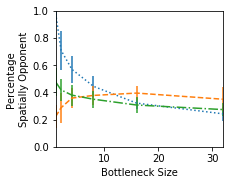

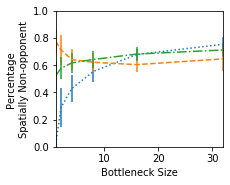

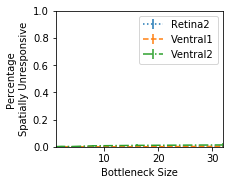

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from statistics import load

frame = pd.read_pickle('logs/spatial-grey.pd')

plt.figure(figsize=(3,2.5))
opps = load.spatial(frame, 'spatially opponent')
retina2 = opps[opps['layer'] == 'retina_relu2']
ventral0 = opps[opps['layer'] == 'ventral_relu0']
ventral1 = opps[opps['layer'] == 'ventral_relu1']

plt.errorbar(retina2['n_bn'], retina2['mean_rel_amount'], yerr=retina2['std_rel_amount'], label='Retina2', linestyle=':')
plt.errorbar(ventral0['n_bn'], ventral0['mean_rel_amount'], yerr=ventral0['std_rel_amount'], label='Ventral1', linestyle='--')
plt.errorbar(ventral1['n_bn'], ventral1['mean_rel_amount'], yerr=ventral1['std_rel_amount'], label='Ventral2', linestyle='-.')
x1,x2,y1,y2 = plt.axis()

plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage \nSpatially Opponent')
plt.xlim(1, 32)
plt.ylim(0, 1)
plt.savefig('figures/spatially_opponent_grey.pdf', bbox_inches='tight')

plt.figure(figsize=(3,2.5))
opps = load.spatial(frame, 'spatially non-opponent')
retina2 = opps[opps['layer'] == 'retina_relu2']
ventral0 = opps[opps['layer'] == 'ventral_relu0']
ventral1 = opps[opps['layer'] == 'ventral_relu1']

plt.errorbar(retina2['n_bn'], retina2['mean_rel_amount'], yerr=retina2['std_rel_amount'], label='Retina2', linestyle=':')
plt.errorbar(ventral0['n_bn'], ventral0['mean_rel_amount'], yerr=ventral0['std_rel_amount'], label='Ventral1', linestyle='--')
plt.errorbar(ventral1['n_bn'], ventral1['mean_rel_amount'], yerr=ventral1['std_rel_amount'], label='Ventral2', linestyle='-.')

plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage \nSpatially Non-opponent')
plt.xlim(1, 32)
plt.ylim(0, 1)
plt.savefig('figures/spatially_nonopponent_grey.pdf', bbox_inches='tight')


plt.figure(figsize=(3,2.5))
opps = load.spatial(frame, 'spatially unresponsive')
retina2 = opps[opps['layer'] == 'retina_relu2']
ventral0 = opps[opps['layer'] == 'ventral_relu0']
ventral1 = opps[opps['layer'] == 'ventral_relu1']

plt.errorbar(retina2['n_bn'], retina2['mean_rel_amount'], yerr=retina2['std_rel_amount'], label='Retina2', linestyle=':')
plt.errorbar(ventral0['n_bn'], ventral0['mean_rel_amount'], yerr=ventral0['std_rel_amount'], label='Ventral1', linestyle='--')
plt.errorbar(ventral1['n_bn'], ventral1['mean_rel_amount'], yerr=ventral1['std_rel_amount'], label='Ventral2', linestyle='-.')

plt.legend()
plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage \nSpatially Unresponsive')
plt.xlim(1, 32)
plt.ylim(0, 1)
plt.savefig('figures/spatially_unresponsive_grey.pdf', bbox_inches='tight')
